In [11]:
import keras

import prepare_data
import os
import sys
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt

from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense, Flatten
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

In [16]:
root_dir = os.path.split(sys.argv[0])[0] + '/'
root_dir = '/home/diff/Документы/Projects/Python/Sochi/Thesis_clustering/'

In [27]:
def plot_history(history):
    plt.style.use('ggplot')
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()



In [33]:

with open(root_dir + 'X_train.pickle', 'rb') as f:
    X_train = pickle.load(f)
with open(root_dir + 'X_test.pickle', 'rb') as f:
    X_test = pickle.load(f)
with open(root_dir + 'y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)
with open(root_dir + 'y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

# #X_train, X_test, y_train, y_test = train_test_split(tmp_ml_df_X, tmp_ml_df_Y, test_size=0.20, random_state=42)
# X_train = np.load(root_dir + 'X_train.npy')
# X_test = np.load(root_dir + 'X_test.npy')
# y_train = np.load(root_dir + 'y_train.npy')
# y_test = np.load(root_dir + 'y_test.npy')
input_shape = X_train.shape[1:]
model = keras.Sequential([
    Flatten(input_shape=input_shape),
    Dense(input_shape[0] * input_shape[1], activation='relu'),
    Dense(input_shape[0] * input_shape[1], activation='relu'),
    Dense(input_shape[1], activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
              )
print(model.summary())
history = model.fit(X_train, y_train,
                    epochs=4,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=30
                    )


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 2920)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 2920)              8529320   
_________________________________________________________________
dense_16 (Dense)             (None, 2920)              8529320   
_________________________________________________________________
dense_17 (Dense)             (None, 292)               852932    
Total params: 17,911,572
Trainable params: 17,911,572
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/4
1255/1255 [==============================] - 138s 110ms/step - loss: 0.0096 - accuracy: 0.6967 - val_loss: 0.0013 - val_accuracy: 0.8355
Epoch 2/4
1255/1255 [==============================] - 138s 110ms/step - loss: 7.5673e-0

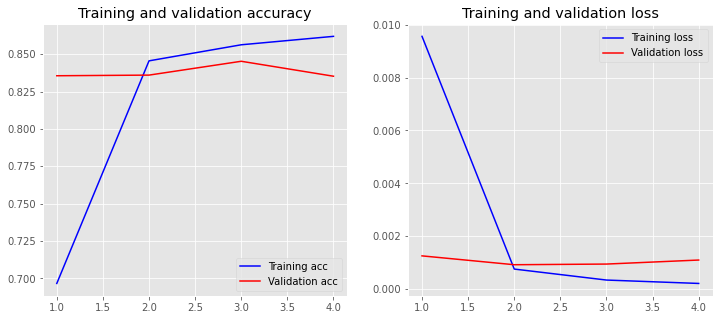

In [34]:
plot_history(history)

In [35]:
model.save(root_dir+'1_model')

INFO:tensorflow:Assets written to: /home/diff/Документы/Projects/Python/Sochi/Thesis_clustering/1_model/assets
